In [1]:
sc
# the default spark context

In [2]:
#enabling SQL processing by intitiation of a SQL context object around SC
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
#World bank data...

--2018-01-19 04:54:54--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: ‘world_bank.json.gz’

100%[======================================>] 446,287     --.-K/s   in 0.02s   

2018-01-19 04:54:54 (17.3 MB/s) - ‘world_bank.json.gz’ saved [446287/446287]



In [4]:
example1_df = sqlContext.read.json("world_bank.json.gz")
#load data to a DF

In [5]:
#shape of the data
#thats really nested.. unlike usual data sets
print(example1_df.printSchema())

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

In [6]:
for row in example1_df.take(2):
    print (row)
    print ("*" * 20) # demarcation
    #take 2 should have done it.. we used the for loop for readability.. by inserting those 20 * marks

Row(_id=Row($oid='52b213b38594d8a2be17c780'), approvalfy='1999', board_approval_month='November', boardapprovaldate='2013-11-12T00:00:00Z', borrower='FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate='2018-07-07T00:00:00Z', country_namecode='Federal Democratic Republic of Ethiopia!$!ET', countrycode='ET', countryname='Federal Democratic Republic of Ethiopia', countryshortname='Ethiopia', docty='Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode='C', grantamt=0, ibrdcommamt=0, id='P129828', idacommamt=130000000, impagency='MINISTRY OF EDUCATION', lendinginstr='Investment Project Financing', lendinginstrtype='IN', lendprojectcost=550000000, majorsector_percent=[Row(Name='Education', Percent=46), Row(Name='Education', Percent=26), Row(Name='Public Administration, Law, and Justice', Percent=16), Row(Name='Education', Percent=12)], mjsector_namecode=[Row(code='EX', name='Education'), Row(code='EX', name='Education'), Row(code='BX

In [7]:
example1_df.registerTempTable("world_bank")
#SQL statements must be run against a table. Create a table that's a pointer to the DataFrame by registerTempTable(DFname)

In [8]:
temp_df =  sqlContext.sql("select * from world_bank") # a new DF to hold the results of the query run against the said data frame.

print (type(temp_df)) # command to identify data type of the said variable
print ("*" * 20) # demarcation
print (temp_df) #print info/schema about the said DF {Col names and datatypes against each}

<class 'pyspark.sql.dataframe.DataFrame'>
********************
DataFrame[_id: struct<$oid:string>, approvalfy: string, board_approval_month: string, boardapprovaldate: string, borrower: string, closingdate: string, country_namecode: string, countrycode: string, countryname: string, countryshortname: string, docty: string, envassesmentcategorycode: string, grantamt: bigint, ibrdcommamt: bigint, id: string, idacommamt: bigint, impagency: string, lendinginstr: string, lendinginstrtype: string, lendprojectcost: bigint, majorsector_percent: array<struct<Name:string,Percent:bigint>>, mjsector_namecode: array<struct<code:string,name:string>>, mjtheme: array<string>, mjtheme_namecode: array<struct<code:string,name:string>>, mjthemecode: string, prodline: string, prodlinetext: string, productlinetype: string, project_abstract: struct<cdata:string>, project_name: string, projectdocs: array<struct<DocDate:string,DocType:string,DocTypeDesc:string,DocURL:string,EntityID:string>>, projectfinancialty

In [9]:
# convert to pandas DF 
#just becasue the DF in spark isnt amiable to visualizaiton SMH >:(
import pandas as pd
sqlContext.sql("select id, borrower from world_bank limit 2").toPandas()
#select just 2 columns from.. over 15.. and limit the selection to 2

,id,borrower
0,P129828,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
1,P144674,GOVERNMENT OF TUNISIA


In [10]:
query = """
select
    regionname ,
    count(*) as project_count
from world_bank
group by regionname 
order by count(*) desc
"""
#just like in java.. populate a SQL query.. and cast/ to object bam...
sqlContext.sql(query).toPandas()
#world bank is the name of the registered table

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


In [11]:
query = """

select * from
    (select
        regionname ,
        count(*) as project_count
    from world_bank
    group by regionname 
    order by count(*) desc) table_alias
limit 2
"""
#subquery gives same as above.. but used a subqery just to see the subquery in axn
sqlContext.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100


In [12]:
example1_df.printSchema()

sql = "select sector.Name from world_bank limit 2" #using dot notaiton to get ... specific field values
# limit to 2
sqlContext.sql(sql).show()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

In [13]:
#to run SQL queries on an existing RDD, you must convert the RDD to a DataFrame. The main difference between RDDs and DataFrames is whether the columns are named.
#apply scheme or create rows with named columns.. for DFs

In [14]:
import random

data_e2 = []
for x in range(1,6):
    random_int = int(random.random() * 10)
    data_e2.append([x, random_int, random_int^2])

In [15]:
# create RDD from the above structure

In [16]:
rdd_example2 = sc.parallelize(data_e2)
print (rdd_example2.collect())

[[1, 2, 0], [2, 5, 7], [3, 3, 1], [4, 1, 3], [5, 9, 11]]


In [17]:
from pyspark.sql.types import *
 # use StructField method to create a schema object that's based on a string,
    #apply the schema to the RDD to create a DataFrame, 
        #and then create a table to run SQL queries on
schemaString = "ID VAL1 VAL2"

In [18]:
fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

In [19]:
schemaExample = sqlContext.createDataFrame(rdd_example2, schema) 
#cast the schema on the DF

In [20]:
#register as table
schemaExample.registerTempTable("example2")

In [21]:
schemaExample.collect()

[Row(ID='1', VAL1='2', VAL2='0'),
 Row(ID='2', VAL1='5', VAL2='7'),
 Row(ID='3', VAL1='3', VAL2='1'),
 Row(ID='4', VAL1='1', VAL2='3'),
 Row(ID='5', VAL1='9', VAL2='11')]

In [22]:
print (schemaExample.collect())

[Row(ID='1', VAL1='2', VAL2='0'), Row(ID='2', VAL1='5', VAL2='7'), Row(ID='3', VAL1='3', VAL2='1'), Row(ID='4', VAL1='1', VAL2='3'), Row(ID='5', VAL1='9', VAL2='11')]


In [23]:
for row in schemaExample.take(2): #schemaExample is the DF made from the RDD
    print (row.ID, row.VAL1, row.VAL2)

1 2 0
2 5 7


In [24]:
#yup it had only 5 rows: the RDD example 2
sqlContext.sql("select * from example2").toPandas()

,ID,VAL1,VAL2
0,1,2,0
1,2,5,7
2,3,3,1
3,4,1,3
4,5,9,11


In [25]:
# the second way of Creating an RDD and then convert it to a DataFrame 
#Create rows with named columns


In [26]:
from pyspark.sql import Row

rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))

print (rdd_example3.collect() ) #still an RDD

[Row(id=1, val1=2, val2=0), Row(id=2, val1=5, val2=7), Row(id=3, val1=3, val2=1), Row(id=4, val1=1, val2=3), Row(id=5, val1=9, val2=11)]


In [27]:
df_example3 = rdd_example3.toDF() #convert to DF
df_example3.registerTempTable("example3") # reggister as a table.. to allow SQL queries

In [28]:

sqlContext.sql("select * from example3").toPandas() # example 3 is the table registered above
#to pandas.. casts the op to a pandas DF.. for a cleaner op like below..and to make available the addl pandas funcitonality

,id,val1,val2
0,1,2,0
1,2,5,7
2,3,3,1
3,4,1,3
4,5,9,11


In [29]:
query = """
select
    *
from
    example2 e2
inner join example3 e3 on
    e2.ID = e3.id
"""

print (sqlContext.sql(query).toPandas()) # the usual join tables.. wit all the usual blitz

  ID VAL1 VAL2  id  val1  val2
0  1    2    0   1     2     0
1  4    1    3   4     1     3
2  3    3    1   3     3     1
3  2    5    7   2     5     7
4  5    9   11   5     9    11


In [30]:
df_example4 = df_example3.join(schemaExample, schemaExample["ID"] == df_example3["id"] )
# alternative ::1 can join DataFrames with a Python command instead of an SQL query as seen above
for row in df_example4.take(5):
    print (row)

Row(id=1, val1=2, val2=0, ID='1', VAL1='2', VAL2='0')
Row(id=4, val1=1, val2=3, ID='4', VAL1='1', VAL2='3')
Row(id=3, val1=3, val2=1, ID='3', VAL1='3', VAL2='1')
Row(id=2, val1=5, val2=7, ID='2', VAL1='5', VAL2='7')
Row(id=5, val1=9, val2=11, ID='5', VAL1='9', VAL2='11')


In [31]:
def simple_function(v): #SQL funcitons.. similar to N @ JFS
    return int(v * 10)

#test the function
#unsure what particular advantage this offers.. :(
print (simple_function(3))

30


In [32]:
# register this funciton.. in the SQL context for usage against a table
sqlContext.registerFunction("simple_function", simple_function)

In [33]:

query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(VAL1) as s_VAL1,
    simple_function(VAL2) as s_VAL2
from
 example2
"""
sqlContext.sql(query).toPandas()

# now using the above registered fucntion in the SQL statement...

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,2,0,2222222222,0
1,2,5,7,5555555555,7777777777
2,3,3,1,3333333333,1111111111
3,4,1,3,1111111111,3333333333
4,5,9,11,9999999999,11111111111111111111


In [34]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(cast(VAL1 as int)) as s_VAL1,
    simple_function(cast(VAL2 as int)) as s_VAL2
from
 example2
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,2,0,20,0
1,2,5,7,50,70
2,3,3,1,30,10
3,4,1,3,10,30
4,5,9,11,90,110


## Converting a pandas DataFrame to a Spark DataFrame

In [35]:
#Spark DataFrames can be faster and more scalable.

#start with a new data set, create a pandas DataFrame for it, and then convert the pandas DataFrame to a Spark DataFrame

In [36]:

!rm ufo-scrubbed-geocoded-time-standardized.csv -f
!rm ufo-sightings-2016-02.csv -f
!wget https://github.com/mafudge/datasets/blob/master/ufo-sightings/ufo-sightings-2016-02.csv

--2018-01-19 04:55:29--  https://github.com/mafudge/datasets/blob/master/ufo-sightings/ufo-sightings-2016-02.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ufo-sightings-2016-02.csv’

    [ <=>                                   ] 202,930     --.-K/s   in 0.1s    

2018-01-19 04:55:30 (1.92 MB/s) - ‘ufo-sightings-2016-02.csv’ saved [202930]



In [95]:
# The code was removed by DSX for sharing.

/usr/local/src/conda3_runtime.v27/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [96]:
#convert to pandas DF
#spark_df = sqlContext.createDataFrame(pandas_df)
type(pandas_df)

pandas.core.frame.DataFrame

In [97]:
placehodler_pd_df = pd.DataFrame()

In [98]:
placehodler_pd_df = pandas_df[['date posted']].copy()

In [99]:
placehodler_pd_df.columns = ['date_posted']

In [100]:
placehodler_pd_df.head()

,date_posted
0,4/27/2004
1,12/16/2005
2,1/21/2008
3,1/17/2004
4,1/22/2004


In [101]:
g1 = placehodler_pd_df.groupby('date_posted').date_posted.count()
#

In [102]:
type(g1)

pandas.core.series.Series

In [124]:
# SO 26097916: series to DF
g2 = g1.to_frame()

In [125]:
g2.head()

,0
date_posted,
1/10/2003,1
1/10/2009,1088
1/10/2014,573
1/11/2002,286
1/11/2005,154


In [130]:
 type(g2)

pandas.core.frame.DataFrame

In [131]:
placehodler_pd_df2 = placehodler_pd_df

In [132]:
placehodler_pd_df2.head()

,date_posted
0,4/27/2004
1,12/16/2005
2,1/21/2008
3,1/17/2004
4,1/22/2004


In [133]:
placehodler_pd_df2['freq'] = placehodler_pd_df2.groupby('date_posted')['date_posted'].transform('count')

In [134]:
placehodler_pd_df2.head()

,date_posted,freq
0,4/27/2004,369
1,12/16/2005,523
2,1/21/2008,407
3,1/17/2004,420
4,1/22/2004,89


In [136]:
placehodler_pd_df2.shape

(80332, 2)

In [140]:
placehodler_pd_df2.drop_duplicates(subset=['freq'], keep=False)

,date_posted,freq


In [143]:
placehodler_pd_df2 =  placehodler_pd_df2.drop_duplicates(subset='date_posted', keep="last")

In [144]:
type(placehodler_pd_df2)

pandas.core.frame.DataFrame

In [145]:
placehodler_pd_df2.shape

(317, 2)

In [ ]:
#reduced to unique values

In [148]:
placehodler_pd_df2.head()

,date_posted,freq
14368,1/20/2003,2
19498,12/21/2012,29
24316,1/10/2003,1
28509,3/25/2002,1
46315,5/23/1999,2


In [149]:

spark_df = sqlContext.createDataFrame(placehodler_pd_df2)

In [150]:

for row in spark_df.take(2):
    print (row)

Row(date_posted='1/20/2003', freq=2)
Row(date_posted='12/21/2012', freq=29)


In [151]:

spark_df.registerTempTable("ufo_sightings")

In [153]:
print (sqlContext.sql("select * from ufo_sightings limit 10").collect())

[Row(date_posted='1/20/2003', freq=2), Row(date_posted='12/21/2012', freq=29), Row(date_posted='1/10/2003', freq=1), Row(date_posted='3/25/2002', freq=1), Row(date_posted='5/23/1999', freq=2), Row(date_posted='1/26/2003', freq=5), Row(date_posted='3/1/2004', freq=4), Row(date_posted='6/3/2011', freq=54), Row(date_posted='6/13/2002', freq=5), Row(date_posted='6/8/2012', freq=58)]


In [154]:

%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

In [155]:
ufos_df = spark_df.toPandas()
# round about..?

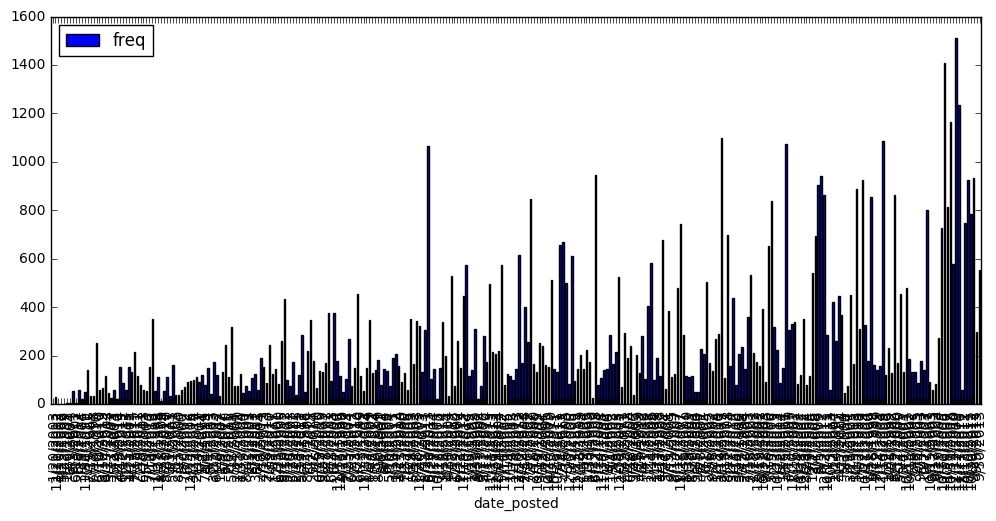

In [161]:
ufos_df.plot(kind='bar', x='date_posted', y='freq', figsize=(12, 5))

In [157]:
# gotta check into this # recheck the names of the plot axes./.. must correspond to the variables..

In [159]:
print (sqlContext.sql("select count(*) from ufo_sightings").collect())

[Row(count(1)=317)]


In [175]:
ufos_df = spark_df.rdd.map(lambda x: Row(**dict(x.asDict(), year=int(x.date_posted[-4:0])))).toDF()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 51.0 failed 10 times, most recent failure: Lost task 0.9 in stage 51.0 (TID 1192, yp-spark-dal09-env5-0025, executor 2db0abe0-5d5a-480b-a050-3fe0a6685e8f): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/spark21master/spark-2.1.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 171, in main
    process()
  File "/usr/local/src/spark21master/spark-2.1.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 166, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/spark21master/spark-2.1.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/src/spark21master/spark/python/pyspark/rdd.py", line 1338, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-175-aed2803629e9>", line 1, in <lambda>
ValueError: invalid literal for int() with base 10: ''

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:326)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.lang.Thread.run(Thread.java:785)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1442)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1430)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1429)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1429)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:803)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:803)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:803)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1657)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1612)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1601)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at java.lang.Thread.getStackTrace(Thread.java:1117)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:629)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1941)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1954)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1967)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:785)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/spark21master/spark-2.1.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 171, in main
    process()
  File "/usr/local/src/spark21master/spark-2.1.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 166, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/spark21master/spark-2.1.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/serializers.py", line 268, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/src/spark21master/spark/python/pyspark/rdd.py", line 1338, in takeUpToNumLeft
    yield next(iterator)
  File "<ipython-input-175-aed2803629e9>", line 1, in <lambda>
ValueError: invalid literal for int() with base 10: ''

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:326)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:290)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:326)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [166]:
 #since there are too many of them.. try to take only the years

In [196]:
ufos_df['year'] = ufos_df.apply(lambda x: x['date_posted'][-4:], axis = 1)

In [197]:
ufos_df.head()

,date_posted,freq,year
0,1/20/2003,2,2003
1,12/21/2012,29,2012
2,1/10/2003,1,2003
3,3/25/2002,1,2002
4,5/23/1999,2,1999


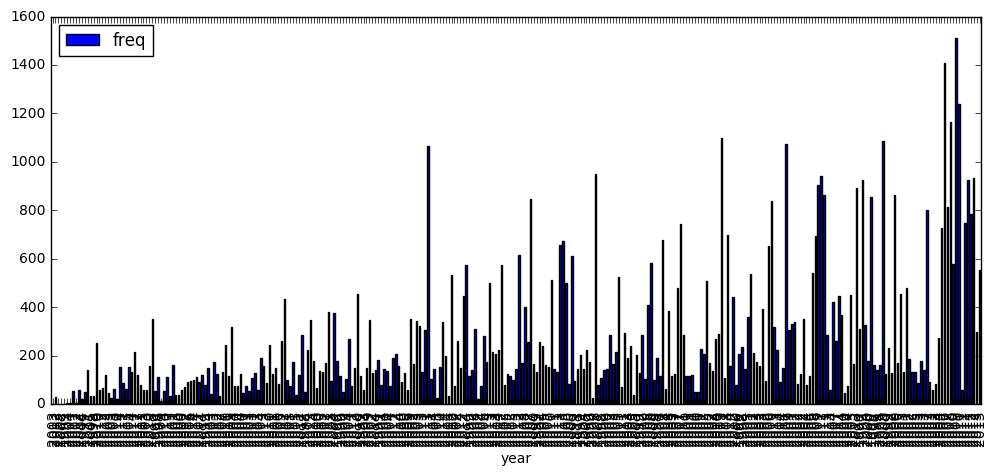

In [198]:
ufos_df.plot(kind='bar', x='year', y='freq', figsize=(12, 5))

In [200]:
# need to aggregate it

In [202]:
ufos_df =  ufos_df.drop_duplicates(subset='year', keep="last")

In [204]:
ufos_df.head()

,date_posted,freq,year
249,1/16/2014,150,2014
280,9/26/1998,160,1998
285,10/2/1999,230,1999
288,9/17/2000,168,2000
291,10/12/2001,481,2001


In [206]:
ufos_df.shape

(17, 3)

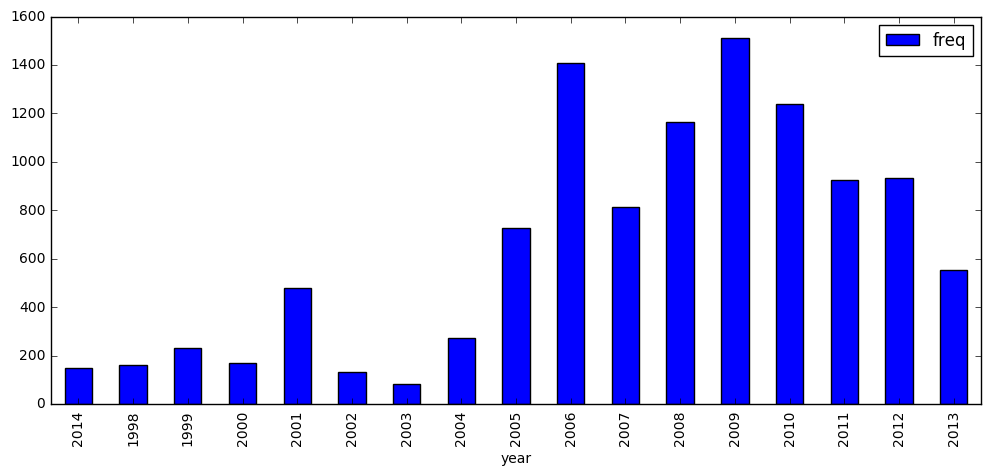

In [207]:
ufos_df.plot(kind='bar', x='year', y='freq', figsize=(12, 5))

In [ ]:
# need to sort

In [210]:
ufos_df2=ufos_df.sort('year')

/usr/local/src/conda3_runtime.v27/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [211]:
ufos_df2.head()

,date_posted,freq,year
280,9/26/1998,160,1998
285,10/2/1999,230,1999
288,9/17/2000,168,2000
291,10/12/2001,481,2001
293,9/13/2002,134,2002


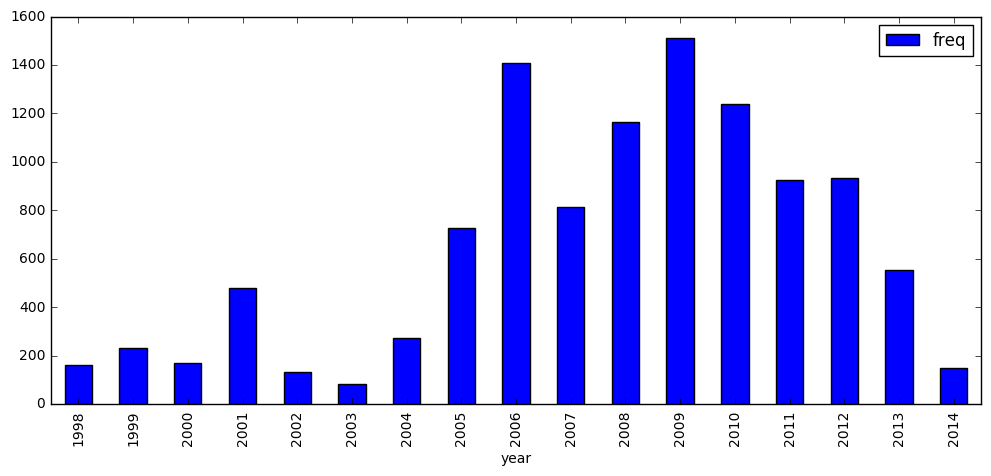

In [212]:
ufos_df2.plot(kind='bar', x='year', y='freq', figsize=(12, 5))

## and done